In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/11-1-Dataset-Predicting House Rent.csv")
df.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
df.shape

(10692, 13)

In [ ]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [ ]:
df = df.drop(["bathroom","floor","animal","furniture","hoa (R$)","property tax (R$)","fire insurance (R$)"],axis=1)
df.head()

,city,area,rooms,parking spaces,rent amount (R$),total (R$)
0,São Paulo,70,2,1,3300,5618
1,São Paulo,320,4,0,4960,7973
2,Porto Alegre,80,1,1,2800,3841
3,Porto Alegre,51,2,0,1112,1421
4,São Paulo,25,1,0,800,836


In [ ]:
df.isnull().sum()

city                0
area                0
rooms               0
parking spaces      0
rent amount (R$)    0
total (R$)          0
dtype: int64

In [ ]:
cat_num= ["city"]
le = LabelEncoder()
for i in cat_num:
    df[i] = le.fit_transform(df[i])
print(df.head())

   city  area  rooms  parking spaces  rent amount (R$)  total (R$)
0     4    70      2               1              3300        5618
1     4   320      4               0              4960        7973
2     2    80      1               1              2800        3841
3     2    51      2               0              1112        1421
4     4    25      1               0               800         836


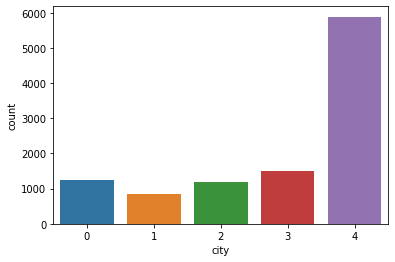

In [ ]:
sns.countplot(x='city', data=df)

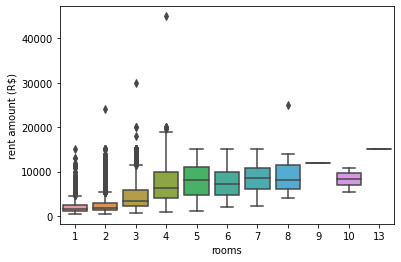

In [ ]:
sns.boxplot(x='rooms', y='rent amount (R$)', data=df)

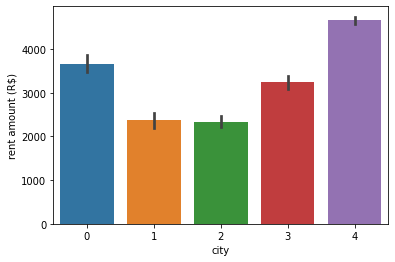

In [ ]:
sns.barplot(x='city', y='rent amount (R$)', data=df)

In [ ]:
X = df.drop(["total (R$)","rent amount (R$)"], axis=1)
Y = df['total (R$)']
print(X.head())
print(Y.head())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=112)
print(X_train)

   city  area  rooms  parking spaces
0     4    70      2               1
1     4   320      4               0
2     2    80      1               1
3     2    51      2               0
4     4    25      1               0
0    5618
1    7973
2    3841
3    1421
4     836
Name: total (R$), dtype: int64
       city  area  rooms  parking spaces
10247     3    75      2               0
10320     4   185      3               2
9715      3    56      2               0
6986      4    49      2               1
145       0    50      2               1
...     ...   ...    ...             ...
684       4   207      3               4
5317      4   220      4               3
2369      4    54      2               1
7642      4    53      2               1
232       4    40      1               0

[8553 rows x 4 columns]


[4034.48911396 5799.06882605 8683.30864813 ... 2622.01213476 8833.72761048
 5731.44103604]
Accuracy of Linear regression :=  0.10038595196670352


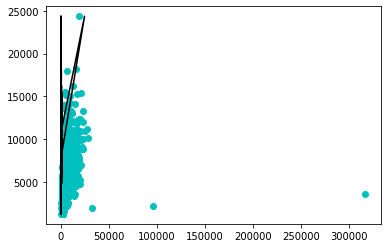

[87113.05692014]


In [ ]:
my_model = LinearRegression()

result = my_model.fit(X_train, Y_train)

predictions = result.predict(X_test)

print(predictions)

print('Accuracy of Linear regression := ', r2_score(Y_test, predictions))

plt.scatter(Y_test, predictions, color='c')
plt.plot(X_test, predictions, color='k')
plt.show()

pred_new = result.predict([[13,40,20,61]])
print(pred_new)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=156)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

my_model1 = LogisticRegression()

result1 = my_model1.fit(X_train, Y_train)

predictions1 = result1.predict(X_test)

print(predictions1)
print("Accuracy of Logistic Regression:", accuracy_score(Y_test, predictions1))

pred_new1 = result1.predict([[13, 40, 20, 61]])
print(pred_new1)

[1219 4089 3294 ... 1219 4089 2555]
Accuracy of Logistic Regression: 0.009817671809256662
[19210]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('By Observing Accuracy of both models, we conclude that Linear Model gives the maximum accuracy.So Linear model will be the best model for our Predicting House Rent Project')

By Observing Accuracy of both model we conclude that Linear Model gives the maximum accuracy.So Linear model will be the best model for our Predicting House Rent Project
